#2(1)Example: Sorting objects using image recognition, such as identifying cats vs. dogs in images.
Rationale: Accuracy is best used when true positives and true negatives are equally important

#2(2)Example: Medical testing for a serious illness, like cancer. The majority of ill patients will be identified for additional testing if the sensitivity is high. Rationale: Finding as many positives as possible is crucial since failing to detect genuine instances could have serious repercussions, so sensivity is mots important where not missing positive cases is critical.

#2(3)Example: Detection of banking fraud. To prevent damaging customer trust by classifying lawful transactions as fraudulent, specificity is essential.Rationale: Reducing false positives minimizes needless interventions or discomfort to those who are not impacted by what the tree is testing for..

#2(4) Example: Screening spam emails. High precision prevents legitimate emails from being incorrectly labelled as spam by ensuring that flagged emails are actually spam. Rationale: Precision guarantees trust in positive forecasts because misclassifying negatives as positives could lead to substantial expenses or dissatisfaction.

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above
# Drop the columns Weight_oz, Width, and Height
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop all rows with NaN entries and create a copy to avoid the warning
ab_reduced_noNaN = ab_reduced.dropna().copy()

# Convert Pub year and NumPages to integers
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)

# Convert Hard_or_Paper to category type
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display the first few rows to verify
print(ab_reduced_noNaN.info())
print(ab_reduced_noNaN.head())


<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)        

In [3]:
from sklearn.model_selection import train_test_split

# Perform an 80/20 split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Report the number of observations in each set
print(f"Number of observations in training set: {len(ab_reduced_noNaN_train)}")
print(f"Number of observations in test set: {len(ab_reduced_noNaN_test)}")



Number of observations in training set: 255
Number of observations in test set: 64


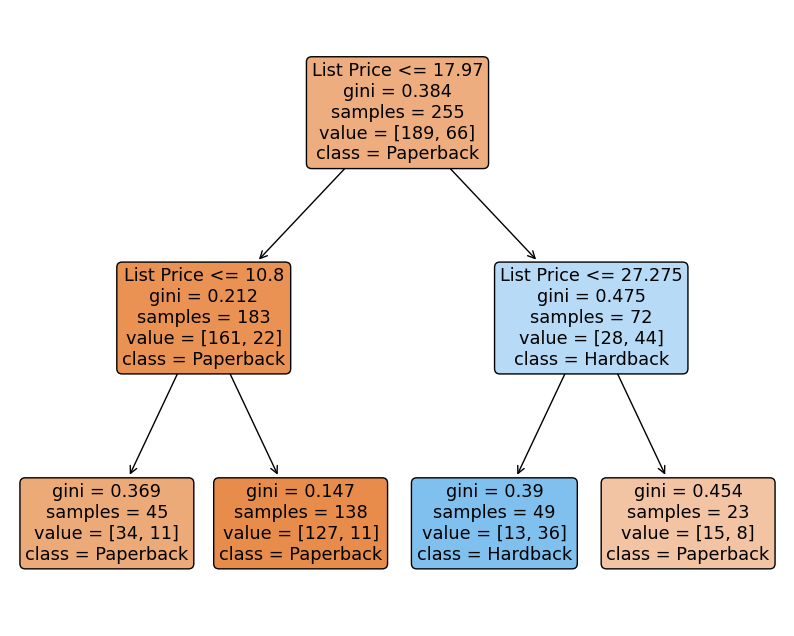

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Define target (y) and feature (X)
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X = ab_reduced_noNaN_train[['List Price']]

# Initialize the DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Fit the classifier
clf.fit(X, y)

# Create the plot
plt.figure(figsize=(10,8))

# Plot the tree and render as PDF
plot_tree(clf, filled=True, feature_names=['List Price'], class_names=['Paperback', 'Hardback'], rounded=True)

# Save the plot as a PDF
plt.savefig('decision_tree.pdf', format='pdf')

# Show the plot
plt.show()


#4 The decision tree checks if List Pirce is less than or equal to 17.97, and if it is then the book is classified as paperback. If not, then if the list price is less than or equal to 27.275, then the book is classified as hardback, otherwise it's also classified as paperback.

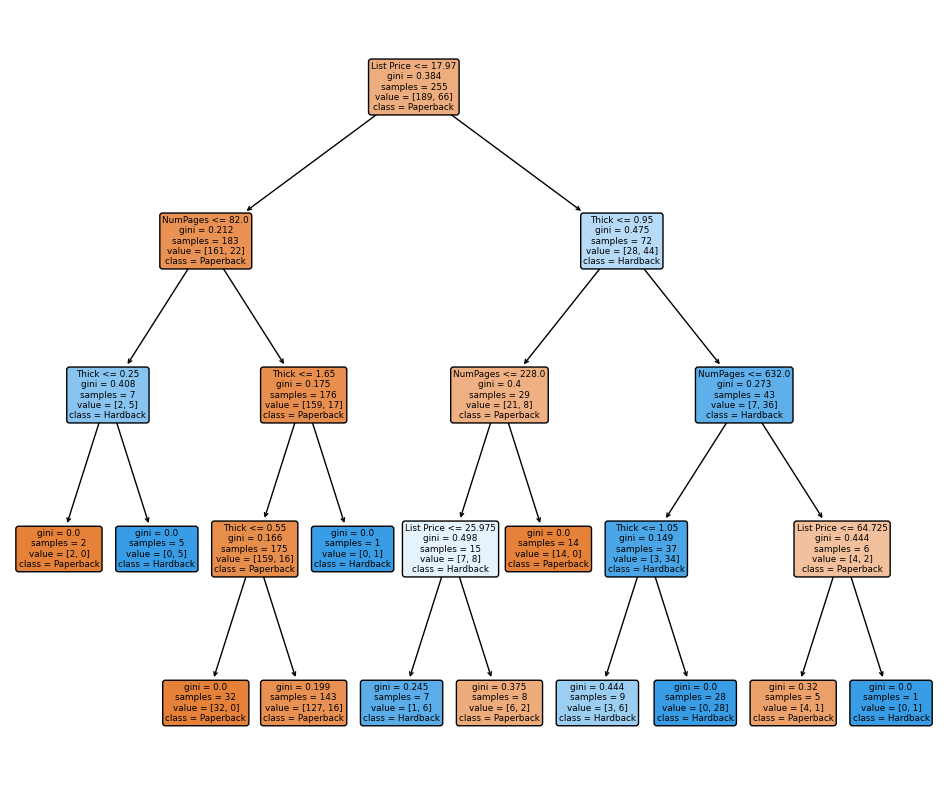

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Define target (y) and features (X)
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]

# Initialize the DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Fit the classifier
clf2.fit(X, y)

# Create the plot
plt.figure(figsize=(12,10))

# Plot the tree and render as PDF
plot_tree(clf2, filled=True, feature_names=['NumPages', 'Thick', 'List Price'], 
          class_names=['Paperback', 'Hardback'], rounded=True)

# Save the plot as a PDF
plt.savefig('decision_tree_clf2.pdf', format='pdf')

# Show the plot
plt.show()


In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, confusion_matrix

# Define target variable (y_test) for the test set
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']
X_test = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]

# Predictions from both models (clf and clf2)
y_pred_clf = clf.predict(X_test[['List Price']])  # Only using 'List Price' for clf
y_pred_clf2 = clf2.predict(X_test[['NumPages', 'Thick', 'List Price']])  # Using all 3 features for clf2

# Generate confusion matrices for both classifiers
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Function to calculate sensitivity, specificity, and accuracy
def calc_metrics(cm):
    # Extract true positives, false positives, true negatives, and false negatives
    tn, fp, fn, tp = cm.ravel()
    
    # Sensitivity (Recall) = TP / (TP + FN)
    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
    
    # Specificity = TN / (TN + FP)
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    
    # Accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) != 0 else 0
    
    return sensitivity, specificity, accuracy

# Calculate metrics for both classifiers
sensitivity_clf, specificity_clf, accuracy_clf = calc_metrics(cm_clf)
sensitivity_clf2, specificity_clf2, accuracy_clf2 = calc_metrics(cm_clf2)

# Print confusion matrices and performance metrics
print("Confusion Matrix for clf:")
print(cm_clf)
print(f"Sensitivity (Recall) for clf: {sensitivity_clf:.3f}")
print(f"Specificity for clf: {specificity_clf:.3f}")
print(f"Accuracy for clf: {accuracy_clf:.3f}\n")

print("Confusion Matrix for clf2:")
print(cm_clf2)
print(f"Sensitivity (Recall) for clf2: {sensitivity_clf2:.3f}")
print(f"Specificity for clf2: {specificity_clf2:.3f}")
print(f"Accuracy for clf2: {accuracy_clf2:.3f}")


Confusion Matrix for clf:
[[40  4]
 [ 6 14]]
Sensitivity (Recall) for clf: 0.700
Specificity for clf: 0.909
Accuracy for clf: 0.844

Confusion Matrix for clf2:
[[40  4]
 [ 5 15]]
Sensitivity (Recall) for clf2: 0.750
Specificity for clf2: 0.909
Accuracy for clf2: 0.859


#7 The differences between the two confusion matrices stem from the features used for training. The first model uses only List Price, while the second model incorporates NumPages, Thick, and List Price, allowing it to capture more information and potentially improve performance. The confusion matrices for clf and clf2 are better because they are evaluated on a separate test set, providing a more accurate measure of model performance, and clf2 uses more informative features for better predictions.

In [8]:
# Get feature importances and corresponding feature names
feature_importances = clf2.feature_importances_
features = clf2.feature_names_in_

# Create a DataFrame to display feature importances alongside feature names
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the most important feature
print(importance_df)


      Feature  Importance
2  List Price    0.485974
1       Thick    0.297490
0    NumPages    0.216537


#9Assuming all other predictors are maintained constant, the coefficients in linear regression show the strength and direction of the link between each predictor variable and the target variable. Because the model is linear, the coefficients can be immediately interpreted as the change in the target variable for a one-unit change in the predictor variable.​ On the other hand, decision tree feature importances are not directly related to a particular scale or unit of measurement; rather, they quantify the extent to which each feature helps lower the overall impurity (such as entropy or Gini impurity) at each decision node in the tree.​Because of this, feature importances in decision trees are more difficult to understand than regression coefficients.

Summary:The user was discussing the difficulty of interpreting feature importances in decision trees compared to regression coefficients. Unlike regression models, where coefficients directly show the relationship between features and the target, decision trees split the data at various decision points, which makes the interpretation of feature importance more complex. https://chatgpt.com/share/673faa35-07bc-8010-9c8a-6a26386aa4a2
In this chat, we discussed using scikit-learn's DecisionTreeClassifier to create and evaluate decision trees, specifically using features such as List Price, NumPages, and Thick to predict whether a book is hardcover or paperback. We explored visualizing decision trees, calculating confusion matrices, and interpreting model performance metrics like sensitivity, specificity, and accuracy. Additionally, we covered how to assess the importance of features in decision trees using the .feature_importances_ attribute and compared it to the interpretation of coefficients in linear regression models. The discussion also highlighted how feature importance in decision trees differs from regression coefficients in terms of their interpretability and role in model prediction.https://chatgpt.com/share/673faa97-2698-8010-b1a0-cc7438c60bf8





